In [1]:
from __future__ import division
from math import exp
import numpy
import neo
from quantities import ms
from pyNN.utility import get_simulator, init_logging, normalized_filename
from pyNN.utility.plotting import DataTable
from pyNN.parameters import Sequence


In [2]:

import pyNN.nest as sim
SENSORPARAMS = {'v_rest': -60.5,
                'cm': 0.025,
                'tau_m': 10.,
                'tau_refrac': 10.0,
                'tau_syn_E': 2.5,
                'tau_syn_I': 2.5,
                'e_rev_E': 0.0,
                'e_rev_I': -75.0,
                'v_thresh': -60.0,
                'v_reset': -60.5}

GO_ON_PARAMS = {'v_rest': -60.5,
                'cm': 0.025,
                'tau_m': 10.0,
                'e_rev_E': 0.0,
                'e_rev_I': -75.0,
                'v_reset': -61.6,
                'v_thresh': -60.51,
                'tau_refrac': 10.0,
                'tau_syn_E': 2.5,
                'tau_syn_I': 2.5}

# POPULATION_PARAMS = SENSORPARAMS * 5 + GO_ON_PARAMS + SENSORPARAMS * 2

population = sim.Population(8, sim.IF_cond_alpha())
population[0:5].set(**SENSORPARAMS)
population[5:6].set(**GO_ON_PARAMS)
population[6:8].set(**SENSORPARAMS)

# Shared Synapse Parameters
syn_params = {'U': 1.0, 'tau_rec': 1.0, 'tau_facil': 1.0}

# Synaptic weights
WEIGHT_RED_TO_ACTOR = 1.5e-4
WEIGHT_RED_TO_GO_ON = 1.2e-3  # or -1.2e-3?
WEIGHT_GREEN_BLUE_TO_ACTOR = 1.05e-4
WEIGHT_GO_ON_TO_RIGHT_ACTOR = 1.4e-4
DELAY = 1

# Connect neurons
CIRCUIT = population

SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_RED_TO_ACTOR),
                                delay=DELAY, **syn_params)
sim.Projection(presynaptic_population=CIRCUIT[2:3],
               postsynaptic_population=CIRCUIT[7:8],
               connector=sim.AllToAllConnector(),
               synapse_type=SYN,
               receptor_type='excitatory')
sim.Projection(presynaptic_population=CIRCUIT[3:4],
               postsynaptic_population=CIRCUIT[6:7],
               connector=sim.AllToAllConnector(),
               synapse_type=SYN,
               receptor_type='excitatory')

SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_RED_TO_GO_ON),
                                delay=DELAY, **syn_params)
sim.Projection(presynaptic_population=CIRCUIT[0:2],
               postsynaptic_population=CIRCUIT[4:5],
               connector=sim.AllToAllConnector(),
               synapse_type=SYN,
               receptor_type='inhibitory')
sim.Projection(presynaptic_population=CIRCUIT[0:2],
               postsynaptic_population=CIRCUIT[5:6],
               connector=sim.AllToAllConnector(),
               synapse_type=SYN,
               receptor_type='inhibitory')

SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_GREEN_BLUE_TO_ACTOR),
                                delay=DELAY, **syn_params)
sim.Projection(presynaptic_population=CIRCUIT[4:5],
               postsynaptic_population=CIRCUIT[7:8],
               connector=sim.AllToAllConnector(),
               synapse_type=SYN,
               receptor_type='excitatory')

SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_GO_ON_TO_RIGHT_ACTOR),
                                delay=DELAY, **syn_params)
sim.Projection(presynaptic_population=CIRCUIT[5:6],
               postsynaptic_population=CIRCUIT[7:8],
               connector=sim.AllToAllConnector(),
               synapse_type=SYN,
               receptor_type='excitatory')

sim.initialize(population, v=population.get('v_rest'))

# print("Circuit description: " + str(population.describe()))


sim.setup(timestep=1, min_delay=1, max_delay=3)
sim.run(1)


/opt/conda/lib/python3.7/site-packages/pyNN/nest/__init__.py:55: UserWarning: Unable to install NEST extensions. Certain models may not be available.
Further details: DynamicModuleManagementError in Install: Module 'pynn_extensions' could not be opened.
The dynamic loader returned the following error: 'file not found'.

Please check LD_LIBRARY_PATH (OSX: DYLD_LIBRARY_PATH)!
  warnings.warn("Unable to install NEST extensions. Certain models may not be available.\nFurther details: {}".format(err))


1.0

In [3]:
import pyNN.standardmodels as sm
# dir(sm.cells.SpikeSourcePoisson)

In [4]:
s =  population.get_data().segments[0]
print(s.spiketrains)
# print(population.meanSpikeCount())

[]


In [7]:
pulse = sim.DCSource(amplitude=0.5, start=20.0, stop=80.0)
pulse.inject_into(sim.Population[0:3])
# p4.inject(pulse)


TypeError: 'type' object is not subscriptable

In [6]:
?sim.Population

In [8]:

from pyNN.utility.plotting import Figure, Panel, DataTable
# Figure(Panel(s.spiketrains, yticks=True, markersize=0.2, xlim=(0, 1000)))

Exception: Can't handle type <class 'list'>

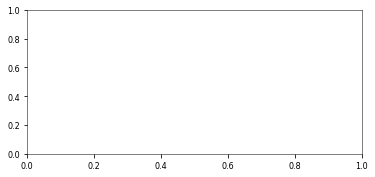

In [13]:

from pyNN.utility.plotting import Figure, Panel, DataTable
# Figure(Panel(s.spiketrains, yticks=True, markersize=0.2, xlim=(0, 1000)))

In [9]:

from pyNN.standardmodels.electrodes import *
pulse = NoisyCurrentSource(mean=0.5, stdev= 1, start=2.0, stop=10.0)
population[1].inject(pulse)

NotImplementedError: Should be redefined in the local simulator electrodes

In [65]:
for a in population.local_cells:
    print(a)

3
4
5
6
7
8
9
10


In [10]:
!cat b.pkl

�cneo.core.block
Block
q )�q}q(X   annotationsq}q(X   sizeqKX   first_indexqK X
   last_indexqKX   first_idqKX   last_idq	K
X   labelq
   mpi_processesqKuX   nameqhX   descriptionqX�  Population "population6"
    Structure   : {'name': 'Line', 'parameters': {'dx': 1.0, 'x0': 0.0, 'y': 0.0, 'z': 0.0}}
    Local cells : 8
    Cell type   : {'name': 'IF_cond_alpha', 'default_parameters': {'v_rest': -65.0, 'cm': 1.0, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 0.3, 'tau_syn_I': 0.5, 'e_rev_E': 0.0, 'e_rev_I': -70.0, 'v_thresh': -50.0, 'v_reset': -65.0, 'i_offset': 0.0}, 'default_initial_values': {'v': -65.0, 'gsyn_exc': 0.0, 'gsyn_inh': 0.0}, 'parameters': {'v_rest': <larray: base_value=-65.0 shape=(8,) dtype=<class 'float'>, operations=[]>, 'cm': <larray: base_value=1.0 shape=(8,) dtype=<class 'float'>, operations=[]>, 'tau_m': <larray: base_value=20.0 shape=(8,) dtype=<class 'float'>, operations=[]>, 'tau_refrac': <larray: base_value=0.1 shape=(8,) dtype=<cla

In [53]:
dir(population)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assembly_class',
 '_connect_parrot_neurons',
 '_create_cells',
 '_deferred_parrot_connections',
 '_get_cell_initial_value',
 '_get_cell_position',
 '_get_parameters',
 '_get_positions',
 '_get_structure',
 '_get_view',
 '_is_sorted',
 '_mask_local',
 '_nPop',
 '_positions',
 '_record_filter',
 '_recorder_class',
 '_set_cell_initial_value',
 '_set_cell_position',
 '_set_initial_value_array',
 '_set_parameters',
 '_set_positions',
 '_set_structure',
 '_simulator',
 '_structure',
 'all',
 'all_cells',
 'annotate',
 'annotations',
 'can_record',
 'celltype',
 'conductance